<a href="https://colab.research.google.com/github/garfield-gray/DIP/blob/main/dipHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#3/10/2030, Let's begin
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#upload the file in advance
im = plt.imread("AnalogScan.jpg", ".jpg")

In [18]:
im.ndim

3

In [19]:
im.shape

(588, 468, 3)

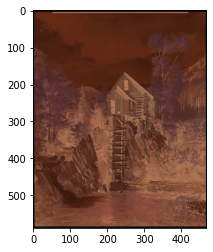

In [20]:
plt.imshow(im)
plt.show()